#코딩테스트[미지의 공간 탈출]-https://www.codetree.ai/frequent-problems/problems/escape-unknown-space/submissions?page=1&page_size=20

.py 파일에서 실행

In [ ]:
import sys
from collections import deque

#입력값 받고 변수에 저장
N, M, F = map(int, sys.stdin.readline().split())
mizi_map = []
for _ in range(N):
    mizi_map.append(list(map(int, sys.stdin.readline().split())))
wall_east = []
wall_west = []
wall_south =[]
wall_north =[]
wall_top =[]
for target in [wall_east, wall_west, wall_south, wall_north, wall_top]:
    for _ in range(M):
        target.append(list(map(int, sys.stdin.readline().split())))
F_dict = {f"F_{F_num}": [] for F_num in range(F)}
for F_num2 in range(F):
    F_dict[f"F_{F_num2}"] = list(map(int, sys.stdin.readline().split()))

#시간의벽 평면도 -> 전개도화  (빈 공간은 X로 채우기)
def expand_matrix(wall_north, wall_south, wall_east, wall_west, wall_top, size):
    expanded_size = size * 3
    expanded_matrix = [['X'] * expanded_size for _ in range(expanded_size)]

    # 벽의 위치 설정
    start = size
    end = start + size
    rot_north1 = [list(row) for row in zip(*wall_north[::-1])]
    rot_north = [list(row) for row in zip(*rot_north1[::-1])]    #180도 회전
    rot_east = [list(row) for row in zip(*wall_east)][::-1]    #좌로 90도 회전
    rot_west = [list(row) for row in zip(*wall_west[::-1])]    #우로 90도 회전전
    # 북쪽 벽
    for i in range(size):
        expanded_matrix[i][start:end] = rot_north[i]

    # 서쪽, 상단(중앙), 동쪽 벽
    for i in range(size):
        expanded_matrix[start + i][:size] = rot_west[i]
        expanded_matrix[start + i][start:end] = wall_top[i]
        expanded_matrix[start + i][end:] = rot_east[i]

    # 남쪽 벽
    for i in range(size):
        expanded_matrix[end + i][start:end] = wall_south[i]

    return expanded_matrix


#이상현상 안에서 진행할지 말지 판단하는 함수 정의
def judge(nowmap, nowpos, direction):  #현재 지도, 현재 위치, 방향에 대한 정보를 주면, 그 방향으로 한칸 후가 0이면 True반환
    afterpos = [nowpos[0] + direction[0],nowpos[1]+ direction[1]]
    if afterpos[0] <= -1 or afterpos[0] >= N or afterpos[1] <= -1 or afterpos[1] >= N:
        return False
    if nowmap[afterpos[0]][afterpos[1]] != 0 : #0이 아니면
        return False
    return True

#이상현상 구현
def Anomaly(start_pos, direction, blank,time):
    mizi_map[start_pos[0]][start_pos[1]] = 1
    if time != 0 and time % blank == 0:  # 시간이 맞으면
        count = (time // blank)
        if direction == 0: #동
            if judge(mizi_map, [start_pos[0],start_pos[1]+1*count] ,[0,1]):
                mizi_map[start_pos[0]][start_pos[1]+1*count] = 1

        elif direction == 1 : #서
            if judge(mizi_map, [start_pos[0],start_pos[1]-1*count],[0,-1]):
                mizi_map[start_pos[0]][start_pos[1]-1*count] = 1


        elif direction == 2 : #남
            if judge(mizi_map, [start_pos[0]-1*count,start_pos[1]],[1,0]):
                mizi_map[start_pos[0]-1*count][start_pos[1]] =1

        elif direction == 3 :#북
            if judge(mizi_map, [start_pos[0]-1*count,start_pos[1]],[-1,0]):
                mizi_map[start_pos[0]-1*count][start_pos[1]] =1





#시간의벽 안에서 최단거리 탐색
def BFS_find(select_map, time, before_queue):

    next_queue = deque()
    while before_queue:  #큐가 있을 떄
        y, x = before_queue.popleft()
        for next_x, next_y in [(x+1,y),(x-1,y),(x,y+1),(x,y-1)]:
            if next_y <= -1 or next_y >= M*3 or next_x <= -1 or next_x >= M*3: #맵 안에 없으면 아래 코드 실행 X
                continue
            if select_map[next_y][next_x] == 'X' :   #X일 경우
                if 0<=next_y<= M-1:
                    if 0<=next_x<= M-1:    #2사분면면
                        next_y, next_x= x, y
                    elif M*2<=next_x:    #1사분면면
                        term = y
                        next_y = M*3-x-1
                        next_x = M*3-term-1
                elif M*2<=next_y:
                    if 0<=next_x<= M-1:    #3사분면면
                        term = y
                        next_y = M*3-x-1
                        next_x = M*3-term-1
                    elif M*2<=next_x:    #4사분면면
                        next_y, next_x= x, y
            if select_map[next_y][next_x] != 0:
                continue
            if select_map[next_y][next_x] == 0:   # 0일 경우
                select_map[next_y][next_x] = time+1
                next_queue.append((next_y,next_x))
    return select_map, next_queue


#미지의 공간에서 최단거리 탐색
def mizi_BFS_find(select_map, time, before_queue):
    next_queue = deque()
    while before_queue:  #큐가 있을 떄
        y, x = before_queue.popleft()
        for next_x, next_y in [(x+1,y),(x-1,y),(x,y+1),(x,y-1)]:
            if next_y <= -1 or next_y >= N or next_x <= -1 or next_x >= N: #맵 안에 없으면 아래 코드 실행 X
                continue
            if select_map[next_y][next_x] != 0:
                continue
            if select_map[next_y][next_x] == 0:   # 0일 경우
                select_map[next_y][next_x] = time+1
                next_queue.append((next_y,next_x))
    return select_map, next_queue



## 이 아래 함수는 특정 지점을 찾는 함수들

#전개도로 만든 시간의 벽에서 도착지점을 찾는 함수. (이 지점에 도착하면 시간의벽 BFS종료료)
def check_wall_exit(mizi_wall_diff):
    if mizi_wall_diff[0] <0 :
        wall_exit = [0, M+mizi_wall_diff[1]]
    elif mizi_wall_diff[1] < 0:
        wall_exit = [M+mizi_wall_diff[0], 0]
    elif mizi_wall_diff[0] >= M:
        wall_exit = [-1, M+mizi_wall_diff[1]]
    elif mizi_wall_diff[1] >= M:
        wall_exit = [M+mizi_wall_diff[0], -1]
    return wall_exit


#시간의 벽 출구를 미지의 지역에서 찾는 함수. (3 옆에 0을 찾음음)
def find_wall_exit(mizi):
    result_indices = []
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    for i in range(N):
        for j in range(N):
            if mizi[i][j] == 0:
                for di, dj in directions:
                    ni, nj = i + di, j + dj
                    if 0 <= ni < N and 0 <= nj < N:
                        if mizi[ni][nj] == 3:
                            result_indices.append((i, j))
                            break  # 한 방향이라도 충족하면 break
    return result_indices

#시간의 벽 전개도에서 타임머신 위치 찾는 함수
def find_time_machine(wall):
    result_indices = []
    for i in range(M*3):
        for j in range(M*3):
            if wall[i][j] == 2:
                result_indices.append((i, j))
                return result_indices

#미지지역에서 시간의 벽 제일 왼쪽 위 찾기
def find_wall_start(mizi):   #
    result_indices = []
    for i in range(N):
        for j in range(N):
            if mizi[i][j] == 3:
                result_indices.append((i, j))
                return result_indices

#미지 지역에서 탈출구를 찾는 함수. (4인 지역 찾기기)
def find_mizi_exit(mizi):
    result_indices = []
    for i in range(N):
        for j in range(N):
            if mizi[i][j] == 4:
                result_indices.append((i, j))
                return result_indices

#미지의 지역 최단거리 탐색 과정에서 다음 탐색 지역이 탈출지역이면 종료시키는 함수.
def example_function(after_queue, mizi_exit, time):
    if after_queue:
        for now_queue in after_queue:
            for su in [(-1,0), (1,0), (0,1), (0,-1)]:
                detect_pos = (now_queue[0]+su[0], now_queue[1]+su[1])
                if detect_pos == mizi_exit[0]:
                    answer = time +2
                    end = False
                    return  end, answer  # 모든 반복문을 즉시 종료하고 값 반환
    return True, -1



mizi_exit = find_mizi_exit(mizi_map)   #미지 지도 출구 찾기기
new_wall = expand_matrix(wall_north, wall_south, wall_east, wall_west, wall_top, M)   #전개도를 펼친 지도 생성
time_machine = find_time_machine(new_wall)[0]
mizi_wall_exit = find_wall_exit(mizi_map)   # 미지 세상 기준 출구찾기
wall_start_point = find_wall_start(mizi_map)   # 미지 지도 기준 벽이 시작되는 왼쪽 윗 점점
mizi_wall_diff = [mizi_wall_exit[0][0]-wall_start_point[0][0],mizi_wall_exit[0][1]-wall_start_point[0][1]]
wall_exit = check_wall_exit(mizi_wall_diff)   # new_wall 지도에서 끝내는 기준 찾기기
time = 0
wall_max = len(new_wall[0])
end = True
start_mizi = False
wall_find = True
impossible = False

while end:
    for F_num2 in range(F):
        Anomaly([F_dict[f"F_{F_num2}"][0],F_dict[f"F_{F_num2}"][1]],F_dict[f"F_{F_num2}"][2],F_dict[f"F_{F_num2}"][3],time+1)

    if wall_find:
        if time ==0:
            after_queue = deque([(time_machine[0],time_machine[1])])
        new_wall, after_queue = BFS_find(new_wall, time, after_queue)
        if new_wall[wall_exit[0]][wall_exit[1]] != 0:
            wall_find = False
            start_mizi = True
            if mizi_map[mizi_wall_exit[0][0]][mizi_wall_exit[0][1]] != 0:
                impossible = True
            else:
                after_queue = deque([(mizi_wall_exit[0][0],mizi_wall_exit[0][1])])
            time += 2
            mizi_map[mizi_wall_exit[0][0]][mizi_wall_exit[0][1]] = time
    if start_mizi:
        mizi_map, after_queue = mizi_BFS_find(mizi_map,time, after_queue)
        end, answer = example_function(after_queue,mizi_exit,time)
        if not after_queue:
            start_mizi = False

    time +=1
    if wall_find == False and start_mizi == False:
        end = False
if impossible:
    print(-1)
else:
    print(answer)


#주가예측 프로그램

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [2]:
ticker = "TSLA"
start_date = "2020-02-25"
end_date = "2025-02-25"
data = yf.download(ticker, start=start_date, end=end_date)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
date = data.index
data = data[['Open','High','Low','Volume','Close']].values # 종가만 선택 & NumPy 배열 변환

In [23]:
scalers = {}  # 각 피처별 스케일러 저장
data_scaled = np.zeros_like(data)
for i in range(data.shape[1]):  # 5개의 피처
    scalers[i] = MinMaxScaler(feature_range=(0, 1))
    data_scaled[:, i] = scalers[i].fit_transform(data[:, i].reshape(-1, 1)).flatten()

def create_data(data, seq_length=60):
    X, y_close,y_open,y_high,y_low, y_volume = [],[],[],[],[],[]
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length,:])
        y_close.append(data[i+seq_length,4])
        y_open.append(data[i+seq_length,0])
        y_high.append(data[i+seq_length,1])
        y_low.append(data[i+seq_length,2])
        y_volume.append(data[i+seq_length,3])
    return np.array(X), np.array(y_close),np.array(y_open),np.array(y_high),np.array(y_low),np.array(y_volume)
seq_length = 60
X, y_close, y_open, y_high, y_low, y_volume = create_data(data_scaled,seq_length)


In [60]:
print(f'X데이터 shape : {X.shape}')
print(f'y_close.shape : {y_close.shape}')
print(f'y_open.shape : {y_open.shape}')
print(f'y_high.shape : {y_high.shape}')
print(f'y_low.shape : {y_low.shape}')
print(f'y_volume.shape : {y_volume.shape}')


X데이터 shape : (1197, 60, 5)
y_close.shape : (1197,)
y_open.shape : (1197,)
y_high.shape : (1197,)
y_low.shape : (1197,)
y_volume.shape : (1197,)


In [25]:
split = int(len(X) * 0.8)
test_date = date[60:]
test_date = test_date[split:]
X_train, X_test = X[:split], X[split:]
y_close_train, y_close_test = y_close[:split], y_close[split:]
y_open_train, y_open_test = y_open[:split], y_open[split:]
y_high_train, y_high_test = y_high[:split], y_high[split:]
y_low_train, y_low_test =  y_low[:split],  y_low[split:]
y_volume_train, y_volume_test = y_volume[:split], y_volume[split:]

X_train_torch = torch.FloatTensor(X_train)
X_test_torch = torch.FloatTensor(X_test)

y_close_train_torch = torch.FloatTensor(y_close_train)
y_close_test_torch = torch.FloatTensor(y_close_test)

y_open_train_torch = torch.FloatTensor(y_open_train)
y_open_test_torch = torch.FloatTensor(y_open_test)

y_high_train_torch = torch.FloatTensor(y_high_train)
y_high_test_torch = torch.FloatTensor(y_high_test)

y_low_train_torch = torch.FloatTensor(y_low_train)
y_low_test_torch = torch.FloatTensor(y_low_test)

y_volume_train_torch = torch.FloatTensor(y_volume_train)
y_volume_test_torch = torch.FloatTensor(y_volume_test)



close_train_dataset = TensorDataset(X_train_torch, y_close_train_torch)
open_train_dataset = TensorDataset(X_train_torch, y_open_train_torch)
high_train_dataset = TensorDataset(X_train_torch, y_high_train_torch)
low_train_dataset = TensorDataset(X_train_torch, y_low_train_torch)
volume_train_dataset = TensorDataset(X_train_torch, y_volume_train_torch)


close_train_loader = DataLoader(close_train_dataset, batch_size=60, shuffle=True)
open_train_loader = DataLoader(open_train_dataset, batch_size=60, shuffle=True)
high_train_loader = DataLoader(high_train_dataset, batch_size=60, shuffle=True)
low_train_loader = DataLoader(low_train_dataset, batch_size=60, shuffle=True)
volume_train_loader = DataLoader(volume_train_dataset, batch_size=60, shuffle=True)

In [26]:
class LSTMModel(nn.Module):
    def __init__(self, input_size=5, hidden_size=64, num_layers=2, dropout=0.1):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:,-1,:])
        return out

In [27]:
#종가 예측 프로그램
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_close = LSTMModel().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model_close.parameters(), lr=0.001)


num_epochs = 200

history = np.zeros((0,2))
for epoch in range(num_epochs):
    model_close.train()
    for X_batch, y_batch in close_train_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)
        optimizer.zero_grad()
        output = model_close(X_batch)
        loss = criterion(output, y_batch.unsqueeze(1))
        loss.backward()
        optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.6f}")
        item = np.array([epoch, loss.item()])
        history = np.vstack((history, item))

Epoch [10/200], Loss: 0.001263
Epoch [20/200], Loss: 0.001310
Epoch [30/200], Loss: 0.001138
Epoch [40/200], Loss: 0.001023
Epoch [50/200], Loss: 0.000832
Epoch [60/200], Loss: 0.000461
Epoch [70/200], Loss: 0.000544
Epoch [80/200], Loss: 0.000636
Epoch [90/200], Loss: 0.000499
Epoch [100/200], Loss: 0.000698
Epoch [110/200], Loss: 0.000584
Epoch [120/200], Loss: 0.000841
Epoch [130/200], Loss: 0.000653
Epoch [140/200], Loss: 0.000828
Epoch [150/200], Loss: 0.000317
Epoch [160/200], Loss: 0.000269
Epoch [170/200], Loss: 0.000555
Epoch [180/200], Loss: 0.000670
Epoch [190/200], Loss: 0.000610
Epoch [200/200], Loss: 0.000380


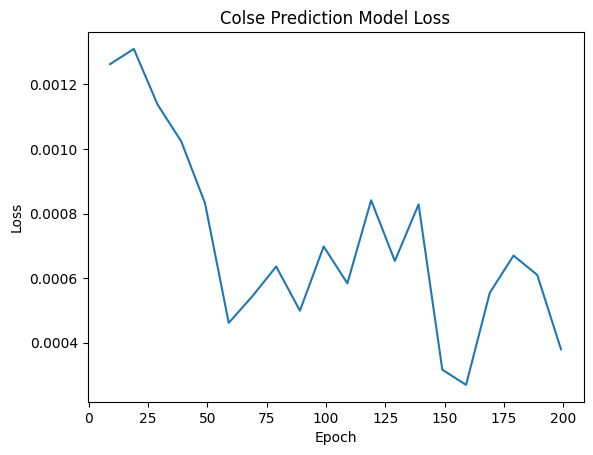

In [28]:
plt.plot(history[:,0],history[:,1])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Colse Prediction Model Loss")
plt.show()

In [61]:
#open가격 예측 프로그램 'Open'
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_open = LSTMModel().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model_open.parameters(), lr=0.001)


num_epochs = 200


train_loader = torch.utils.data.DataLoader(list(zip(X_train_torch, y_open_train_torch)), batch_size=batch_size, shuffle=True)
history = np.zeros((0,2))
for epoch in range(num_epochs):
    model_open.train()
    for X_batch, y_batch in open_train_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)
        optimizer.zero_grad()
        output = model_open(X_batch)
        loss = criterion(output, y_batch.unsqueeze(1))
        loss.backward()
        optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.6f}")
        item = np.array([epoch, loss.item()])
        history = np.vstack((history, item))

Epoch [10/200], Loss: 0.001150
Epoch [20/200], Loss: 0.000842
Epoch [30/200], Loss: 0.001025
Epoch [40/200], Loss: 0.000656
Epoch [50/200], Loss: 0.000693
Epoch [60/200], Loss: 0.000501
Epoch [70/200], Loss: 0.000354
Epoch [80/200], Loss: 0.000321
Epoch [90/200], Loss: 0.000268
Epoch [100/200], Loss: 0.000323
Epoch [110/200], Loss: 0.000352
Epoch [120/200], Loss: 0.000212
Epoch [130/200], Loss: 0.000247
Epoch [140/200], Loss: 0.000153
Epoch [150/200], Loss: 0.000186
Epoch [160/200], Loss: 0.000144
Epoch [170/200], Loss: 0.000226
Epoch [180/200], Loss: 0.000211
Epoch [190/200], Loss: 0.000111
Epoch [200/200], Loss: 0.000165


Text(0.5, 1.0, 'Open Prediction Model Loss')

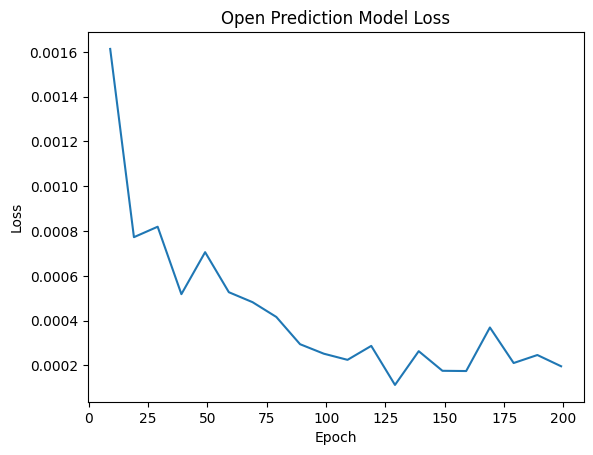

In [30]:
plt.plot(history[:,0],history[:,1])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Open Prediction Model Loss")

In [31]:
#high가격 예측 프로그램 'Open'
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_high  = LSTMModel().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model_high.parameters(), lr=0.001)


num_epochs = 200



history = np.zeros((0,2))
for epoch in range(num_epochs):
    model_high.train()
    for X_batch, y_batch in high_train_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)
        optimizer.zero_grad()
        output = model_high(X_batch)
        loss = criterion(output, y_batch.unsqueeze(1))
        loss.backward()
        optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.6f}")
        item = np.array([epoch, loss.item()])
        history = np.vstack((history, item))

Epoch [10/200], Loss: 0.000863
Epoch [20/200], Loss: 0.000681
Epoch [30/200], Loss: 0.001062
Epoch [40/200], Loss: 0.000730
Epoch [50/200], Loss: 0.000565
Epoch [60/200], Loss: 0.000683
Epoch [70/200], Loss: 0.000557
Epoch [80/200], Loss: 0.000384
Epoch [90/200], Loss: 0.000319
Epoch [100/200], Loss: 0.000241
Epoch [110/200], Loss: 0.000261
Epoch [120/200], Loss: 0.000436
Epoch [130/200], Loss: 0.000255
Epoch [140/200], Loss: 0.000188
Epoch [150/200], Loss: 0.000568
Epoch [160/200], Loss: 0.000234
Epoch [170/200], Loss: 0.000278
Epoch [180/200], Loss: 0.000576
Epoch [190/200], Loss: 0.000216
Epoch [200/200], Loss: 0.000235


Text(0.5, 1.0, 'High Prediction Model Loss')

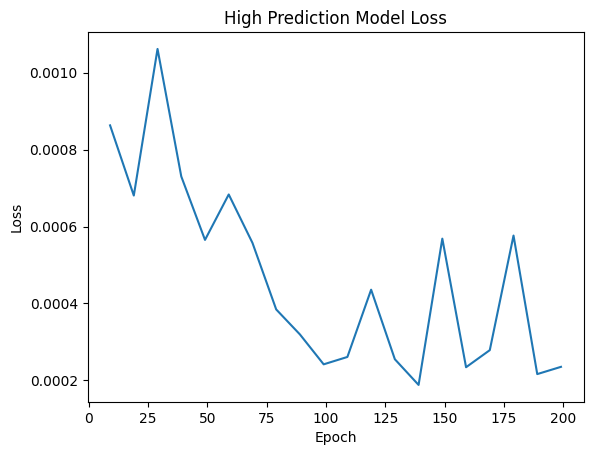

In [32]:
plt.plot(history[:,0],history[:,1])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("High Prediction Model Loss")

In [33]:
#low가격 예측 프로그램 'Open'
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_low  = LSTMModel().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model_low.parameters(), lr=0.001)


num_epochs = 200



history = np.zeros((0,2))
for epoch in range(num_epochs):
    model_low.train()
    for X_batch, y_batch in low_train_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)
        optimizer.zero_grad()
        output = model_low(X_batch)
        loss = criterion(output, y_batch.unsqueeze(1))
        loss.backward()
        optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.6f}")
        item = np.array([epoch, loss.item()])
        history = np.vstack((history, item))

Epoch [10/200], Loss: 0.001824
Epoch [20/200], Loss: 0.001027
Epoch [30/200], Loss: 0.000934
Epoch [40/200], Loss: 0.001168
Epoch [50/200], Loss: 0.000899
Epoch [60/200], Loss: 0.000667
Epoch [70/200], Loss: 0.000876
Epoch [80/200], Loss: 0.000603
Epoch [90/200], Loss: 0.000533
Epoch [100/200], Loss: 0.000307
Epoch [110/200], Loss: 0.000592
Epoch [120/200], Loss: 0.000389
Epoch [130/200], Loss: 0.000499
Epoch [140/200], Loss: 0.000332
Epoch [150/200], Loss: 0.000259
Epoch [160/200], Loss: 0.000361
Epoch [170/200], Loss: 0.000349
Epoch [180/200], Loss: 0.000362
Epoch [190/200], Loss: 0.000321
Epoch [200/200], Loss: 0.000393


Text(0.5, 1.0, 'Low Prediction Model Loss')

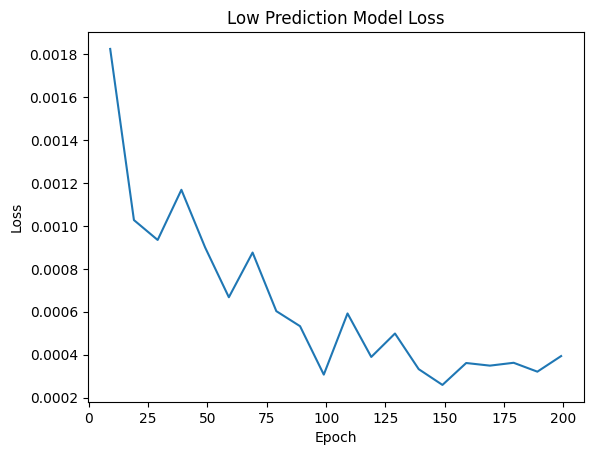

In [34]:
plt.plot(history[:,0],history[:,1])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Low Prediction Model Loss")

In [35]:
#low가격 예측 프로그램 'Open'
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_volume  = LSTMModel().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model_volume.parameters(), lr=0.001)


num_epochs = 200



history = np.zeros((0,2))
for epoch in range(num_epochs):
    model_volume.train()
    for X_batch, y_batch in volume_train_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)
        optimizer.zero_grad()
        output = model_volume(X_batch)
        loss = criterion(output, y_batch.unsqueeze(1))
        loss.backward()
        optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.6f}")
        item = np.array([epoch, loss.item()])
        history = np.vstack((history, item))

Epoch [10/200], Loss: 0.001607
Epoch [20/200], Loss: 0.003609
Epoch [30/200], Loss: 0.002622
Epoch [40/200], Loss: 0.003186
Epoch [50/200], Loss: 0.005333
Epoch [60/200], Loss: 0.002296
Epoch [70/200], Loss: 0.001599
Epoch [80/200], Loss: 0.002954
Epoch [90/200], Loss: 0.001315
Epoch [100/200], Loss: 0.001985
Epoch [110/200], Loss: 0.002518
Epoch [120/200], Loss: 0.002301
Epoch [130/200], Loss: 0.001723
Epoch [140/200], Loss: 0.003070
Epoch [150/200], Loss: 0.001951
Epoch [160/200], Loss: 0.002196
Epoch [170/200], Loss: 0.001486
Epoch [180/200], Loss: 0.003169
Epoch [190/200], Loss: 0.004009
Epoch [200/200], Loss: 0.002033


Text(0.5, 1.0, 'Volume Prediction Model Loss')

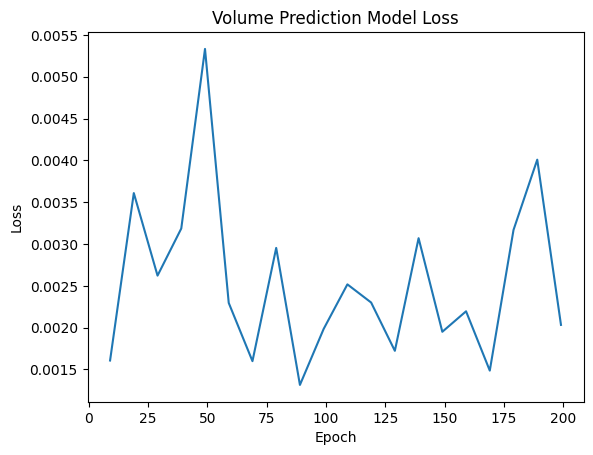

In [36]:
plt.plot(history[:,0],history[:,1])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Volume Prediction Model Loss")

In [37]:
# 모델 평가 모드 설정
model_close.eval()
model_open.eval()
model_high.eval()
model_low.eval()
model_volume.eval()

with torch.no_grad():
    # 데이터를 장치로 이동
    X_test_torch = X_test_torch.to(device)

    # 예측 수행
    y_close_pred = model_close(X_test_torch).cpu().numpy()
    y_open_pred = model_open(X_test_torch).cpu().numpy()
    y_high_pred = model_high(X_test_torch).cpu().numpy()
    y_low_pred = model_low(X_test_torch).cpu().numpy()
    y_volume_pred = model_volume(X_test_torch).cpu().numpy()

    # 역정규화 (inverse_transform)
    close_pred_inv = scalers[4].inverse_transform(y_close_pred.reshape(-1, 1))
    open_pred_inv = scalers[0].inverse_transform(y_open_pred.reshape(-1, 1))
    high_pred_inv = scalers[1].inverse_transform(y_high_pred.reshape(-1, 1))
    low_pred_inv = scalers[2].inverse_transform(y_low_pred.reshape(-1, 1))
    volume_pred_inv = scalers[3].inverse_transform(y_volume_pred.reshape(-1, 1))

    close_test_inv = scalers[4].inverse_transform(y_close_test.reshape(-1, 1))
    open_test_inv = scalers[0].inverse_transform(y_open_test.reshape(-1, 1))
    high_test_inv = scalers[1].inverse_transform(y_high_test.reshape(-1, 1))
    low_test_inv = scalers[2].inverse_transform(y_low_test.reshape(-1, 1))
    volume_test_inv = scalers[3].inverse_transform(y_volume_test.reshape(-1, 1))

In [38]:
print(y_low_pred.max())

0.9969834


In [40]:
colors = {
    "open": "blue",
    "high": "green",
    "low": "purple",
    "close": "red",
    "volume": "orange"
}

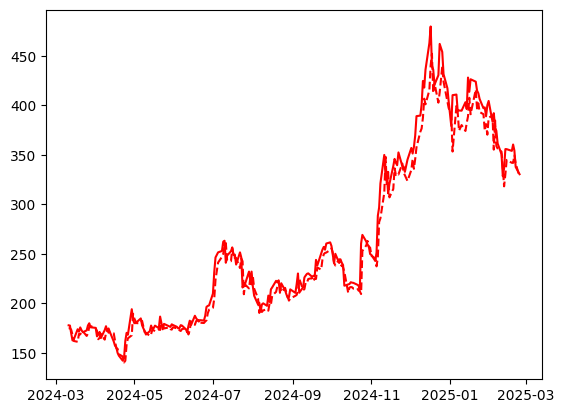

In [41]:
plt.plot(test_date, close_test_inv, color=colors["close"], linestyle='-', label="Actual Close Price")
plt.plot(test_date, close_pred_inv, color=colors["close"], linestyle='--', label="Predicted Close Price")

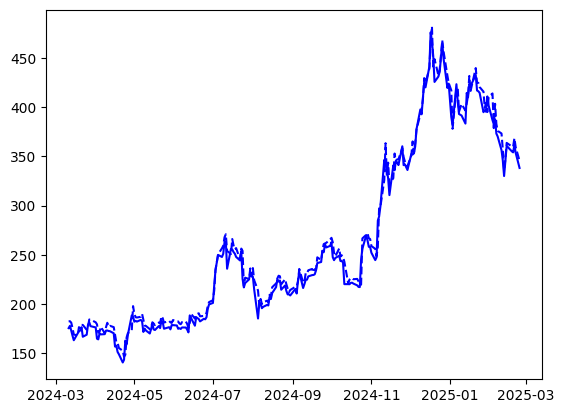

In [42]:
plt.plot(test_date, open_test_inv, color=colors["open"], linestyle='-', label="Actual Open Price")
plt.plot(test_date, open_pred_inv, color=colors["open"], linestyle='--', label="Predicted Open Price")

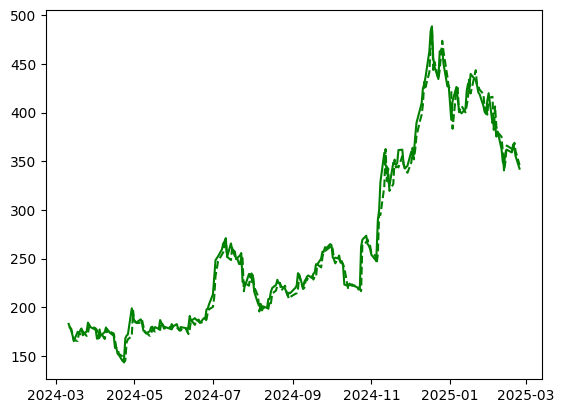

In [43]:
plt.plot(test_date, high_test_inv, color=colors["high"], linestyle='-', label="Actual High Price")
plt.plot(test_date, high_pred_inv, color=colors["high"], linestyle='--', label="Predicted High Price")

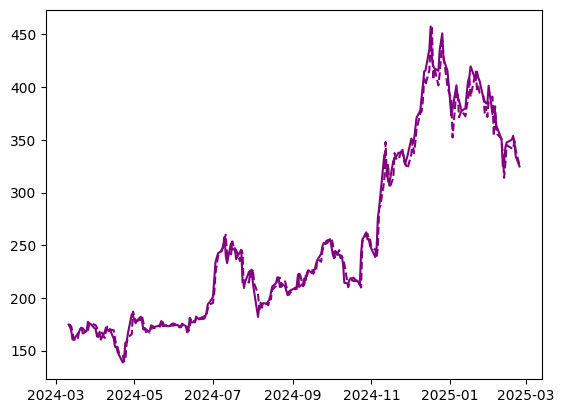

In [44]:
plt.plot(test_date, low_test_inv, color=colors["low"], linestyle='-', label="Actual Low Price")
plt.plot(test_date, low_pred_inv, color=colors["low"], linestyle='--', label="Predicted Low Price")

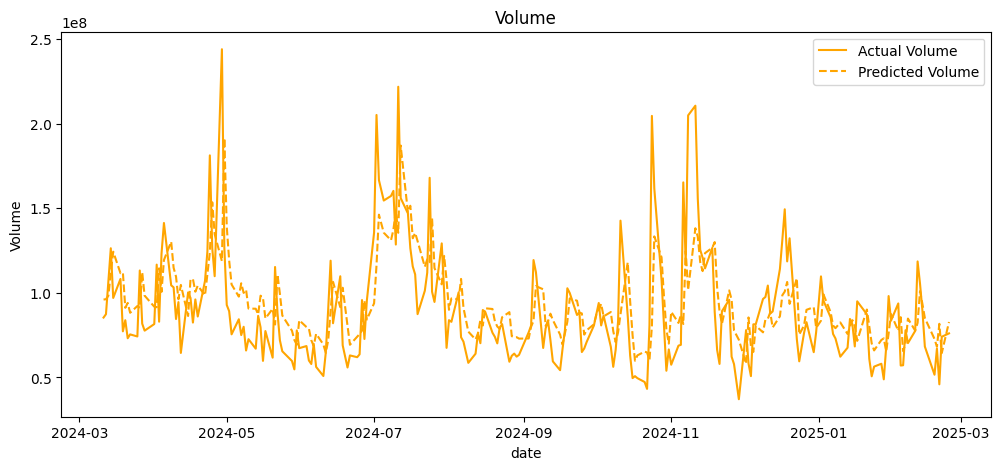

In [62]:
plt.figure(figsize=(12, 5))
plt.plot(test_date, volume_test_inv, color=colors["volume"], linestyle='-', label="Actual Volume")
plt.plot(test_date, volume_pred_inv, color=colors["volume"], linestyle='--', label="Predicted Volume")
plt.xlabel("date")
plt.ylabel('Volume')
plt.title("Volume")
plt.legend()
plt.show()

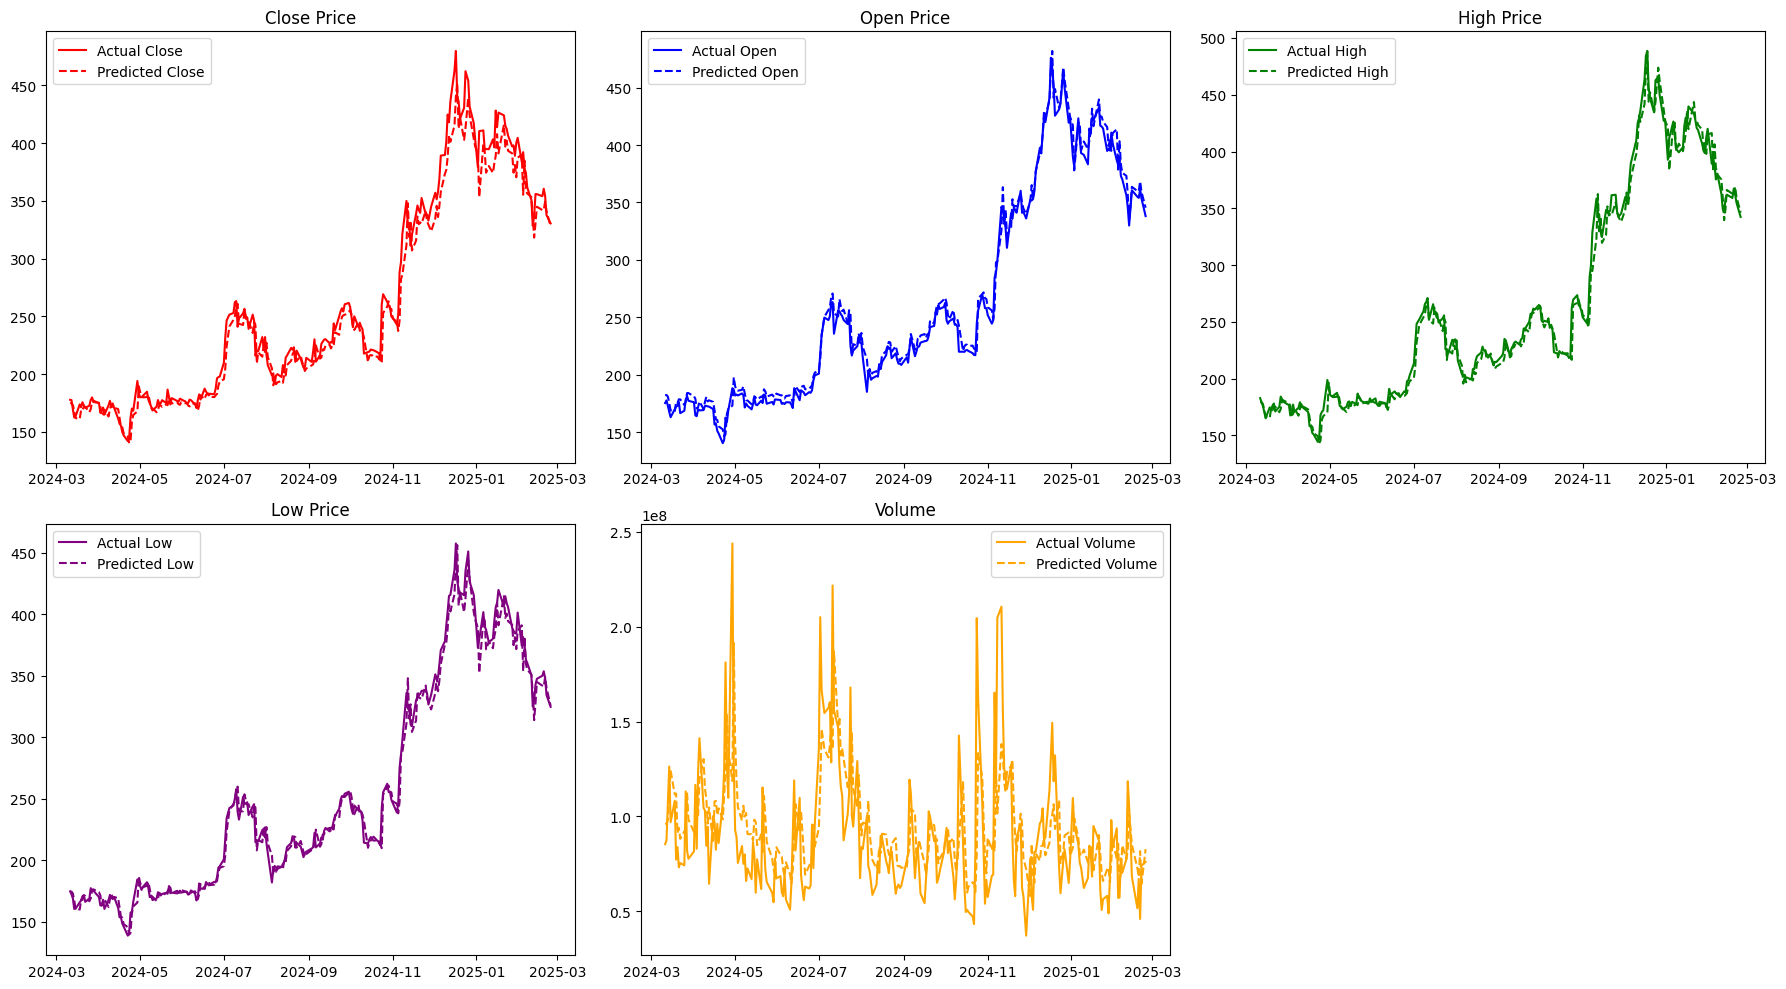

In [56]:
import matplotlib.pyplot as plt

# 2x3 서브플롯 생성 (5개의 그래프 출력, 마지막 하나는 빈 공간)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()  # 2D 배열을 1D 리스트로 변환

# 색상 정의 (테스트 데이터: 실선, 예측값: 점선)
colors = {
    "open": "blue",
    "high": "green",
    "low": "purple",
    "close": "red",
    "volume": "orange"
}

# 각 서브플롯에 그래프 추가
# 1. Close Price
axes[0].plot(test_date, close_test_inv, color=colors["close"], linestyle='-', label="Actual Close")
axes[0].plot(test_date, close_pred_inv, color=colors["close"], linestyle='--', label="Predicted Close")
axes[0].set_title("Close Price")
axes[0].legend()

# 2. Open Price
axes[1].plot(test_date, open_test_inv, color=colors["open"], linestyle='-', label="Actual Open")
axes[1].plot(test_date, open_pred_inv, color=colors["open"], linestyle='--', label="Predicted Open")
axes[1].set_title("Open Price")
axes[1].legend()

# 3. High Price
axes[2].plot(test_date, high_test_inv, color=colors["high"], linestyle='-', label="Actual High")
axes[2].plot(test_date, high_pred_inv, color=colors["high"], linestyle='--', label="Predicted High")
axes[2].set_title("High Price")
axes[2].legend()

# 4. Low Price
axes[3].plot(test_date, low_test_inv, color=colors["low"], linestyle='-', label="Actual Low")
axes[3].plot(test_date, low_pred_inv, color=colors["low"], linestyle='--', label="Predicted Low")
axes[3].set_title("Low Price")
axes[3].legend()

# 5. Volume
axes[4].plot(test_date, volume_test_inv, color=colors["volume"], linestyle='-', label="Actual Volume")
axes[4].plot(test_date, volume_pred_inv, color=colors["volume"], linestyle='--', label="Predicted Volume")
axes[4].set_title("Volume")
axes[4].legend()

# 6번째 빈 그래프 제거
fig.delaxes(axes[5])

# 전체 그래프 레이아웃 조정
plt.tight_layout()
plt.show()


In [47]:
import torch
import numpy as np

def predict_future_prices(
    model_open, model_high, model_low, model_close, model_volume,
    initial_data, scalers, num_days=10, device="cpu"
):
    """
    각 항목별 모델을 사용하여 미래 주가(Open, High, Low, Close, Volume) 예측

    Args:
        model_open, model_high, model_low, model_close, model_volume: 학습된 LSTM 모델
        initial_data (np.array): (60, 5) 형태의 최근 60일 데이터
        scalers (list): 각 주가 항목에 대한 정규화 복원용 Scaler 리스트
        num_days (int): 예측할 미래 일수
        device (str): "cpu" 또는 "cuda"

    Returns:
        np.array: (num_days, 5) 형태의 예측된 미래 주가 (Open, High, Low, Close, Volume)
    """
    # 모델 평가 모드 설정
    model_open.eval()
    model_high.eval()
    model_low.eval()
    model_close.eval()
    model_volume.eval()

    future_predictions = []

    # 데이터를 Tensor로 변환하고 차원 맞추기 (Batch 차원 추가)
    current_data = torch.FloatTensor(initial_data).unsqueeze(0).to(device)  # (1, 60, 5)

    with torch.no_grad():
        for _ in range(num_days):
            # 모델을 사용해 다음날 가격 예측
            predicted_open = model_open(current_data).cpu().numpy().flatten()[0]  # Open 예측
            predicted_high = model_high(current_data).cpu().numpy().flatten()[0]  # High 예측
            predicted_low = model_low(current_data).cpu().numpy().flatten()[0]    # Low 예측
            predicted_close = model_close(current_data).cpu().numpy().flatten()[0]  # Close 예측
            predicted_volume = model_volume(current_data).cpu().numpy().flatten()[0]  # Volume 예측

            # 각 항목별 역정규화 수행['Open','High','Low','Volume','Close']
            predicted_real_values = [
                scalers[0].inverse_transform([[predicted_open]])[0][0],
                scalers[1].inverse_transform([[predicted_high]])[0][0],
                scalers[2].inverse_transform([[predicted_low]])[0][0],
                scalers[4].inverse_transform([[predicted_close]])[0][0],
                scalers[3].inverse_transform([[predicted_volume]])[0][0]
            ]
            future_predictions.append(predicted_real_values)  # 예측값 저장

            # 새로운 입력 데이터 만들기 (60일 데이터 유지, 가장 오래된 데이터 제거)
            new_data = np.roll(current_data.cpu().numpy(), shift=-1, axis=1)  # 왼쪽으로 이동
            new_data[0, -1, :] = [predicted_open, predicted_high, predicted_low, predicted_close, predicted_volume]  # 예측값 추가

            # 업데이트된 데이터를 Tensor로 변환 후 모델에 다시 입력
            current_data = torch.FloatTensor(new_data).to(device)

    return np.array(future_predictions)  # (num_days, 5) 형태의 예측된 미래 주가 반환


In [49]:


# 최신 60일 데이터 가져오기 (마지막 60일)
latest_60_days = data[-60:]  # (60, 5)

# 데이터를 정규화 (훈련 데이터에서 사용한 스케일러 활용)
latest_60_days_scaled = np.zeros_like(latest_60_days, dtype=np.float32)

for i in range(latest_60_days.shape[1]):  # 5개의 피처 (Open, High, Low, Close, Volume)
    latest_60_days_scaled[:, i] = scalers[i].transform(latest_60_days[:, i].reshape(-1, 1)).flatten()

# LSTM 모델과 최신 데이터를 사용하여 10일치 주가 예측
future_prices = predict_future_prices(
    model_open, model_high, model_low, model_close, model_volume,
    latest_60_days_scaled, scalers, num_days=10, device=device
)

# 예측된 주가 출력
print("예측된 미래 주가 (Open, High, Low, Close, Volume):")
print(future_prices.shape)
future_close = future_prices[:,3]

예측된 미래 주가 (Open, High, Low, Close, Volume):
(10, 5)


In [50]:
ticker = "TSLA"
start_date = "2025-02-25"
end_date = "2025-03-04"
real_data = yf.download(ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [51]:

real_date = real_data.index
real_closed = real_data[['Close']].values

In [52]:
# 마지막 날짜 가져오기
last_date = real_date[-1]

# 5일 추가 (주말/공휴일 포함)
new_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=5, freq='D')
updated_dates = real_date.append(new_dates)
y_close_test
last_real = np.vstack((close_test_inv,real_closed))

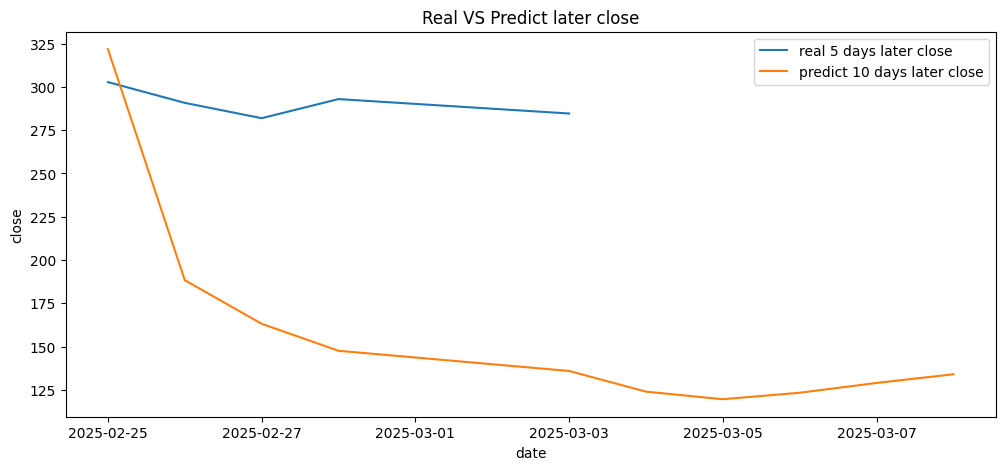

In [66]:
plt.figure(figsize=(12, 5))
plt.plot(real_date, real_closed, label = 'real 5 days later close')
plt.plot(updated_dates,future_close, label = 'predict 10 days later close')
plt.legend()
plt.xlabel('date')
plt.ylabel('close')
plt.title('Real VS Predict later close')
plt.show()

In [54]:
last_date_real = test_date.append(real_date)
last_date_pre = test_date.append(updated_dates)

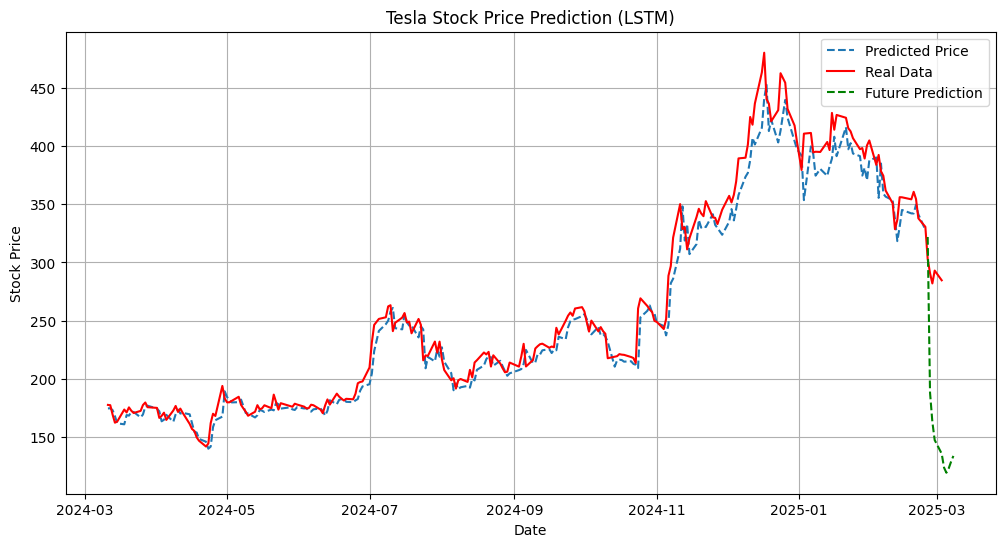

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# 기존의 실제 가격과 예측 가격 플롯
# plt.plot(test_date, y_test_inv, '-', label="Actual Price")  # 실제 주가 (실선)
plt.plot(test_date, close_pred_inv,'--' ,label="Predicted Price")  # 예측 주가 (실선)

# 추가할 실제 데이터 (real_date, real_closed) - 점선(dashed line)
# plt.plot(real_date, real_closed, 'r--', label="Real Data")  # 빨간 점선
plt.plot(last_date_real, last_real, 'r', label="Real Data")  # 빨간 점선

# 추가할 미래 예측 데이터 (updated_dates, future_prices) - 점선(dashed line)
plt.plot(updated_dates, future_close, 'g--', label="Future Prediction")  # 초록 점선

# 그래프 설정
plt.legend()
plt.title("Tesla Stock Price Prediction (LSTM)")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.grid(True)
plt.show()